In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

In [0]:
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [0]:
from xgboost              import XGBClassifier
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.tree         import ExtraTreeClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm             import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
pd.set_option('use_inf_as_na', True)

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TextAnalytics/features_multi_classification.csv')

In [83]:
dataset.head()

,ArticleId:start:stop,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,...,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2,PropagandaTechnique
0,111111112:191:221,5.165000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.423,0.577,0.000,18.4200,3.000000,0.200000,6.000000,5,0.000000,0.0,20.000000,0.000000,...,0.000000,0.000000,20.000000,0.0,0.0,0.000000,0.0,0.000000,20.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000,0.000000,0.0,0.0,0.0,0.065506,0.5215,0.041495,0.064896,0.330348,Slogans
1,111111112:476:556,5.694545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.071429,0.0,0.071429,0.000000,0.071429,0.000000,0.071429,0.0,0.071429,1.000000,0.139,0.588,0.273,6.7271,8.477226,0.214286,5.363636,14,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,14.285714,0.0,0.0,0.000000,0.0,7.142857,0.0,7.142857,0.0,7.142857,7.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.142857,7.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.339890,0.5215,0.215306,1.676765,0.330348,Black-and-White_Fallacy
2,111111112:785:798,4.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.750,0.250,0.000,8.7900,3.000000,0.000000,4.333333,3,33.333333,0.0,0.000000,0.000000,...,0.000000,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.0,0.0,0.0,33.333333,0.000000,0.0,0.0,0.0,1.712280,0.5215,1.084657,14.397043,0.330348,Slogans
3,111111112:958:1015,5.105000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.818182,0.301,0.699,0.000,0.5000,3.000000,0.384615,4.000000,13,7.692308,0.0,7.692308,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.384615,0.000000,15.384615,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.692308,0.0,0.0,0.0,0.719379,0.5215,0.455696,0.000000,0.330348,Loaded_Language
4,111111112:1456:1536,5.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.000000,0.0,0.133333,0.000000,0.000000,0.066667,0.133333,0.0,0.000000,1.000000,0.214,0.636,0.150,8.5415,8.477226,0.266667,5.000000,15,6.666667,0.0,6.666667,0.066667,...,6.666667,0.000000,13.333333,0.0,0.0,6.666667,0.0,6.666667,0.0,0.000000,0.0,6.666667,0.000000,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,13.333333,0.000000,0.000000,6.666667,6.666667,6.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.910841,0.5215,0.576979,0.000000,0.330348,Flag-Waving


In [84]:
dataset.replace([np.inf, -np.inf], np.nan)

,ArticleId:start:stop,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,...,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2,PropagandaTechnique
0,111111112:191:221,5.165000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.423,0.577,0.000,18.4200,3.000000,0.200000,6.000000,5,0.000000,0.0,20.000000,0.000000,...,0.000000,0.000000,20.000000,0.0,0.000000,0.000000,0.0,0.000000,20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000,0.000000,0.0,0.0,0.0,0.065506,0.521500,0.041495,0.064896,0.330348,Slogans
1,111111112:476:556,5.694545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.071429,0.000000,0.071429,0.000000,0.071429,0.000000,0.071429,0.000000,0.071429,1.000000,0.139,0.588,0.273,6.7271,8.477226,0.214286,5.363636,14,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,14.285714,0.0,0.000000,0.000000,0.0,7.142857,0.0,7.142857,0.000000,7.142857,7.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.142857,7.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.339890,0.521500,0.215306,1.676765,0.330348,Black-and-White_Fallacy
2,111111112:785:798,4.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.750,0.250,0.000,8.7900,3.000000,0.000000,4.333333,3,33.333333,0.0,0.000000,0.000000,...,0.000000,33.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.0,0.0,0.0,33.333333,0.000000,0.0,0.0,0.0,1.712280,0.521500,1.084657,14.397043,0.330348,Slogans
3,111111112:958:1015,5.105000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.818182,0.301,0.699,0.000,0.5000,3.000000,0.384615,4.000000,13,7.692308,0.0,7.692308,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.384615,0.000000,15.384615,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.692308,0.0,0.0,0.0,0.719379,0.521500,0.455696,0.000000,0.330348,Loaded_Language
4,111111112:1456:1536,5.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.000000,0.000000,0.133333,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,1.000000,0.214,0.636,0.150,8.5415,8.477226,0.266667,5.000000,15,6.666667,0.0,6.666667,0.066667,...,6.666667,0.000000,13.333333,0.0,0.000000,6.666667,0.0,6.666667,0.0,0.000000,0.000000,6.666667,0.000000,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,13.333333,0.000000,0.000000,6.666667,6.666667,6.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.910841,0.521500,0.576979,0.000000,0.330348,Flag-Waving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,999001621:5057:5061,5.000000,0

In [0]:
dataset.fillna(0, inplace=True)

In [12]:
dataset.isnull().sum().sum()

0

In [86]:
dataset.isna().sum().sum()

0

In [0]:
labels = ['Appeal_to_Authority',
'Appeal_to_fear-prejudice',
'Bandwagon',
'Black-and-White_Fallacy',
'Causal_Oversimplification',
'Doubt',
'Exaggeration,Minimisation',
'Flag-Waving',
'Loaded_Language',
'Name_Calling,Labeling',
'Obfuscation,Intentional_Vagueness,Confusion',
'Red_Herring',
'Reductio_ad_hitlerum',
'Repetition',
'Slogans',
'Straw_Men',
'Thought-terminating_Cliches',
'Whataboutism']

# labels = ['Loaded_Language','Name_Calling,Labeling','Repetition','Doubt','Exaggeration,Minimisation','Flag-Waving','Appeal_to_fear-prejudice']

In [88]:
len(labels)

18

In [89]:
dataset.PropagandaTechnique.value_counts()


Loaded_Language                                1807
Name_Calling,Labeling                           928
Repetition                                      456
Doubt                                           423
Exaggeration,Minimisation                       398
Flag-Waving                                     206
Appeal_to_fear-prejudice                        187
Causal_Oversimplification                       170
Slogans                                         120
Black-and-White_Fallacy                          97
Appeal_to_Authority                              91
Thought-terminating_Cliches                      70
Whataboutism                                     55
Reductio_ad_hitlerum                             44
Red_Herring                                      24
Straw_Men                                        11
Obfuscation,Intentional_Vagueness,Confusion      10
Bandwagon                                        10
Name: PropagandaTechnique, dtype: int64

In [0]:
# dataset = dataset[dataset['PropagandaTechnique'] != 'Slogans']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Black-and-White_Fallacy']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Appeal_to_Authority']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Thought-terminating_Cliches']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Whataboutism']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Reductio_ad_hitlerum']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Red_Herring']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Straw_Men']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Obfuscation,Intentional_Vagueness,Confusion']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Bandwagon']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Causal_Oversimplification']

In [43]:
# dataset.PropagandaTechnique.value_counts()

Loaded_Language              1807
Name_Calling,Labeling         928
Repetition                    456
Doubt                         423
Exaggeration,Minimisation     398
Flag-Waving                   206
Appeal_to_fear-prejudice      187
Name: PropagandaTechnique, dtype: int64

In [90]:
y = dataset['PropagandaTechnique']
y.head()

0                    Slogans
1    Black-and-White_Fallacy
2                    Slogans
3            Loaded_Language
4                Flag-Waving
Name: PropagandaTechnique, dtype: object

In [91]:
x = dataset.drop(['ArticleId:start:stop','PropagandaTechnique'], axis = 1)
x.head()

,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,CC,...,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2
0,5.165000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.423,0.577,0.000,18.4200,3.000000,0.200000,6.000000,5,0.000000,0.0,20.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,20.000000,0.0,0.0,0.000000,0.0,0.000000,20.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000,0.000000,0.0,0.0,0.0,0.065506,0.5215,0.041495,0.064896,0.330348
1,5.694545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.071429,0.0,0.071429,0.000000,0.071429,0.000000,0.071429,0.0,0.071429,1.000000,0.139,0.588,0.273,6.7271,8.477226,0.214286,5.363636,14,0.000000,0.0,0.000000,0.000000,0.071429,...,0.0,0.000000,0.000000,14.285714,0.0,0.0,0.000000,0.0,7.142857,0.0,7.142857,0.0,7.142857,7.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.142857,7.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.339890,0.5215,0.215306,1.676765,0.330348
2,4.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.750,0.250,0.000,8.7900,3.000000,0.000000,4.333333,3,33.333333,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.0,0.0,0.0,33.333333,0.000000,0.0,0.0,0.0,1.712280,0.5215,1.084657,14.397043,0.330348
3,5.105000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.818182,0.301,0.699,0.000,0.5000,3.000000,0.384615,4.000000,13,7.692308,0.0,7.692308,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.384615,0.000000,15.384615,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.692308,0.0,0.0,0.0,0.719379,0.5215,0.455696,0.000000,0.330348
4,5.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.000000,0.0,0.133333,0.000000,0.000000,0.066667,0.133333,0.0,0.000000,1.000000,0.214,0.636,0.150,8.5415,8.477226,0.266667,5.000000,15,6.666667,0.0,6.666667,0.066667,0.000000,...,0.0,6.666667,0.000000,13.333333,0.0,0.0,6.666667,0.0,6.666667,0.0,0.000000,0.0,6.666667,0.000000,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,13.333333,0.000000,0.000000,6.666667,6.666667,6.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.910841,0.5215,0.576979,0.000000,0.330348


In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2,random_state = 42, stratify = y,)

In [0]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [94]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4085, 144)
(1022, 144)
(4085,)
(1022,)


In [95]:
y_test.head()

0              Loaded_Language
1    Exaggeration,Minimisation
2              Loaded_Language
3     Appeal_to_fear-prejudice
4              Loaded_Language
Name: PropagandaTechnique, dtype: object

In [0]:
from sklearn import metrics
import seaborn as sns

In [0]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
  # classes = np.unique(y_train)
  # classes.sort()
  # class_samples = np.bincount(y_train)
  classes, class_samples = np.unique(y_train, return_counts=True)
  classes.sort()
  total_samples = class_samples.sum()
  # total_samples = len(y_train)
  n_classes = len(class_samples)
  weights = total_samples / (n_classes * class_samples * 1.0)
  class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
  class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
  sample_weights = [class_weight_dict[y] for y in y_train]
  return sample_weights

In [0]:
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

In [0]:
def computeScores(clf, X_train, y_train, X_test, y_test):   
    # __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        # if not hasattr(clf, 'feature_importances_'):
        clf.fit(X_train, y_train)
        # clf.fit(X_train, y_train, class_weight=class_weights)
        # if not hasattr(clf, 'feature_importances_'):
        #   raise AttributeError("{} does not have feature_importances_ attribute".format(clf.__class__.__name__))
                
    except Exception as e:
        print(e)

    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    f1score = f1_score(y_test, y_pred,average=None)
    
    print("********************************************************************************************************")
    print (clf.__class__.__name__)
    print("========================================================================================================")
    print ("Accuracy: ", accuracy)
    # print("F1 Score: ", f1score)
    print("Confusion_matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
  
    print(clf.__class__.__name__, " Classification report:")
    print(metrics.classification_report(y_test, y_pred, digits=3))
    cm = metrics.confusion_matrix(y_test, y_pred)
    cmdf = cm2df(cm, labels)
    plt.figure(figsize=(7,7))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(cmdf, cmap=cmap, annot=True, fmt='d')
    plt.xlabel('Predicted',size =18)
    plt.ylabel('Actual', size =18)
    plt.title(clf.__class__.__name__)
    plt.show()
    # plt.savefig(path)
    print("********************************************************************************************************")
        
    return accuracy, f1score

In [0]:
def plot_feature_importances(clf, X_train, y_train=None, top_n=10, figsize=(12,6), print_table=False, title="Feature Importances"):
   
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.bar(title=title, figsize=figsize)
    plt.ylabel('Feature Importance Score')
    s = "/content/drive/My Drive/Colab Notebooks/TextAnalytics/multiClass results/" + clf.__class__.__name__
    plt.savefig(s)
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

In [102]:
dataset['PropagandaTechnique'].value_counts().values

array([1807,  928,  456,  423,  398,  206,  187,  170,  120,   97,   91,
         70,   55,   44,   24,   11,   10,   10])

In [103]:
largest_class_weight_coef =  max(dataset['PropagandaTechnique'].value_counts().values)/dataset.shape[0]
largest_class_weight_coef
#pass y_train as numpy array


#And then use it like this
# xg = XGBClassifier(n_estimators=1000, weights = weight, max_depth=20)

0.3538280791071079

In [0]:
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

In [0]:
clfs = [ XGBClassifier(objective='multi:softmax', n_jobs = -1, num_classes=18 ),         
        LGBMClassifier(objective='multiclass',num_class=18), 
        ExtraTreesClassifier(),
        ExtraTreeClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(), 
        AdaBoostClassifier(),
        RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)]

In [0]:
# LogisticRegression(n_jobs= -1),, 

********************************************************************************************************
XGBClassifier
Accuracy:  0.5293542074363993
Confusion_matrix:
[[  3   1   0   0   1  10   0   0   1   1   0   0   0   0   1   0   0   0]
 [  1   6   0   1   1   8   2   3  12   0   0   0   2   0   0   0   1   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   4   4   2   0   3   0   1   0   0   0   0   0   0   0]
 [  0   3   0   1   9  16   1   0   3   1   0   0   0   0   0   0   0   0]
 [  1   5   0   0   6  57   3   0  10   2   0   0   0   0   0   0   0   1]
 [  1   1   0   0   0   7  16   2  43   8   0   0   0   1   0   0   1   0]
 [  0   2   0   1   0  10   1  10  11   4   0   0   0   0   2   0   0   0]
 [  0   1   0   0   2   7   5   1 303  35   0   0   0   6   2   0   0   0]
 [  0   0   0   0   1   2   5   1  70 103   0   0   0   4   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


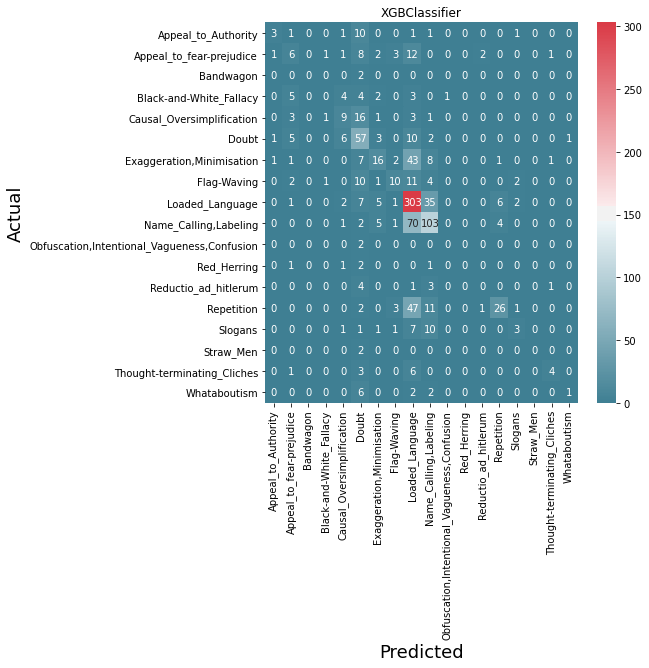

********************************************************************************************************
********************************************************************************************************
LGBMClassifier
Accuracy:  0.5440313111545988
Confusion_matrix:
[[  1   1   0   0   0  11   0   1   3   0   0   0   1   0   0   0   0   0]
 [  1   8   0   1   1  11   2   1  10   1   0   0   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   5   0   2   2   2   1   0   7   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   5  18   0   0   9   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   4  59   4   0  14   2   0   0   0   0   0   0   0   0]
 [  0   1   0   0   2   2  19   1  40  12   0   0   0   1   1   0   1   0]
 [  0   2   0   1   0   8   3  11   8   7   0   0   0   0   1   0   0   0]
 [  0   1   0   0   2   3   7   1 296  40   0   0   0  10   1   0   1   0]
 [  0   0   0   0   1   0   8   0  67  99   0   0   

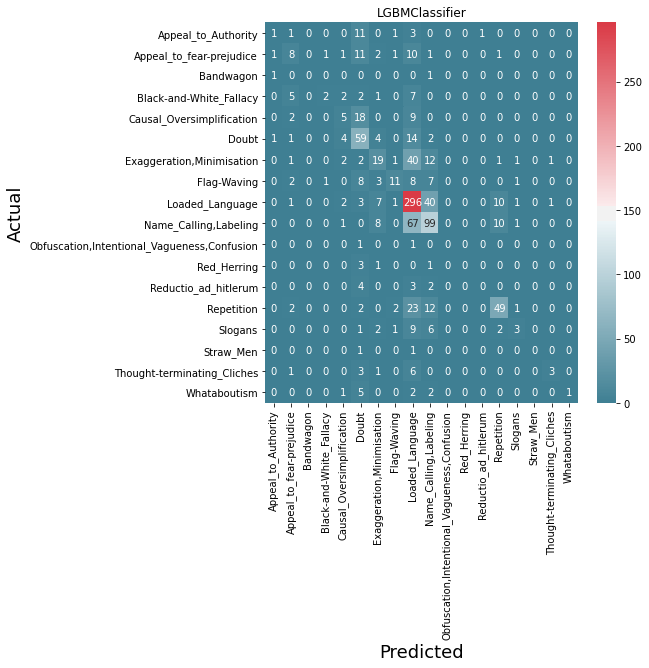

********************************************************************************************************
********************************************************************************************************
ExtraTreesClassifier
Accuracy:  0.538160469667319
Confusion_matrix:
[[  0   2   0   0   0  13   0   0   2   1   0   0   0   0   0   0   0   0]
 [  1   3   0   1   0  19   2   0  10   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   2   2   5   1   0   5   0   1   0   0   0   0   0   0   0]
 [  0   2   0   0   7  19   0   0   6   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   5  63   2   0  10   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   7  19   1  38  10   0   0   0   1   0   0   2   0]
 [  0   2   0   0   1  13   2  10   8   4   0   0   0   1   0   0   0   0]
 [  0   1   0   0   0   7   5   0 291  46   0   0   1   9   1   0   1   0]
 [  0   0   0   0   0   3   6   0  73  92   0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


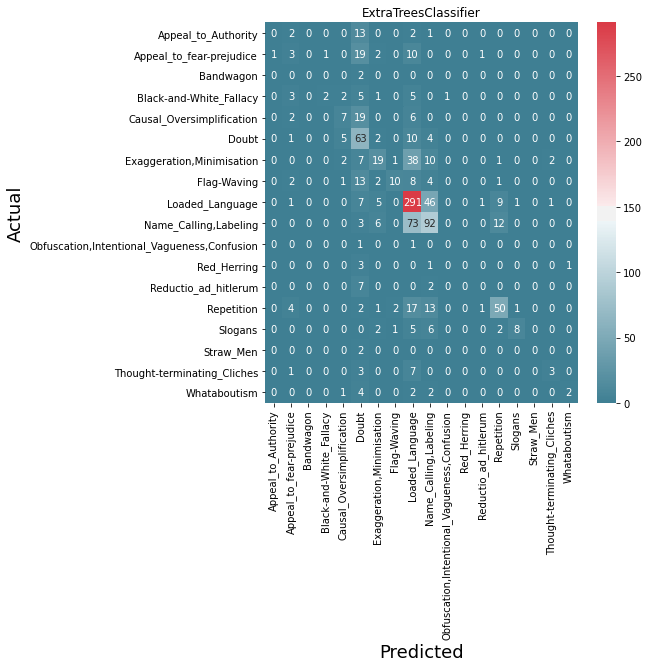

********************************************************************************************************
********************************************************************************************************
ExtraTreeClassifier
Accuracy:  0.41193737769080235
Confusion_matrix:
[[  1   2   0   0   0   5   0   2   6   0   0   1   0   0   1   0   0   0]
 [  1   6   0   1   4  10   4   1   6   3   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   3   2   0   4   1   0   0   2   0   1   1   0   0]
 [  4   4   0   0   5   9   6   1   3   0   0   0   1   0   0   0   1   0]
 [  0  11   0   3   9  30   7   3  12   6   0   1   0   0   0   0   0   3]
 [  1   3   0   0   2   4  17   5  24  16   0   0   0   3   1   0   3   1]
 [  0   3   0   0   0   7   2  14   4   5   0   0   0   2   1   0   2   1]
 [  1  12   1   2   2   8  24   4 206  59   1   0   1  32   6   1   2   0]
 [  0   2   0   2   3   1  16   3  56  82   1 

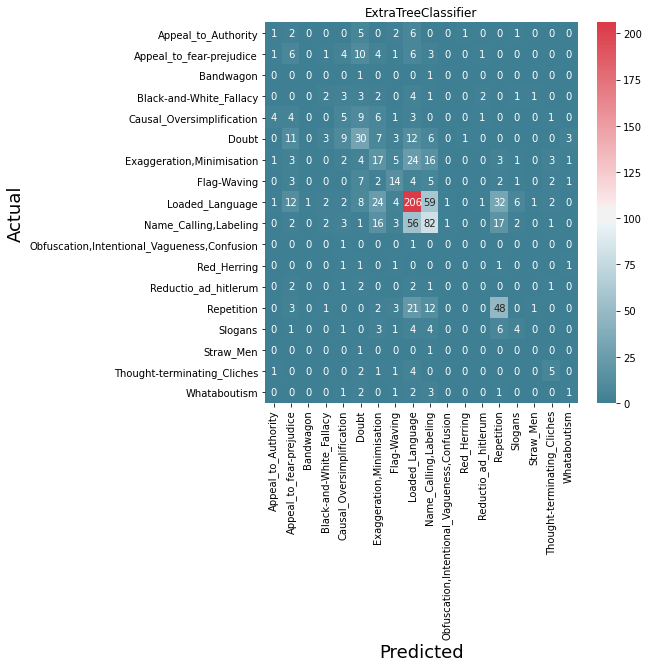

********************************************************************************************************
********************************************************************************************************
DecisionTreeClassifier
Accuracy:  0.4217221135029354
Confusion_matrix:
[[  1   1   0   2   1   5   1   0   4   1   0   0   0   1   1   0   0   0]
 [  3   4   0   4   4   1   2   2  11   1   0   0   1   0   0   1   1   2]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  2   2   0   4   1   1   1   0   2   2   0   1   0   0   1   0   2   0]
 [  1   6   0   2   5  10   2   4   2   1   0   0   1   0   0   0   0   0]
 [  8   6   0   3   9  27   5   1  10   6   0   2   0   0   2   1   0   5]
 [  0   2   0   0   4  10  19   2  24  13   0   0   1   0   2   0   2   1]
 [  3   5   0   1   4   1   3  10   5   4   0   0   1   2   2   0   0   0]
 [  1   6   0   0   1   3  20   3 225  64   1   0   0  26   6   0   3   3]
 [  0   2   0   0   0   1  11   3  64  78   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                        Appeal_to_Authority      0.050     0.056     0.053        18
                   Appeal_to_fear-prejudice      0.103     0.108     0.105        37
                                  Bandwagon      0.000     0.000     0.000         2
                    Black-and-White_Fallacy      0.211     0.211     0.211        19
                  Causal_Oversimplification      0.161     0.147     0.154        34
                                      Doubt      0.360     0.318     0.337        85
                  Exaggeration,Minimisation      0.271     0.237     0.253        80
                                Flag-Waving      0.333     0.244     0.282        41
                            Loaded_Language      0.597     0.622     0.609       362
                      Name_Calling,Labeling      0.411     0.419     0.415       186
Obfuscation,Intentional_Vagueness,Confusion      0.000     0.000

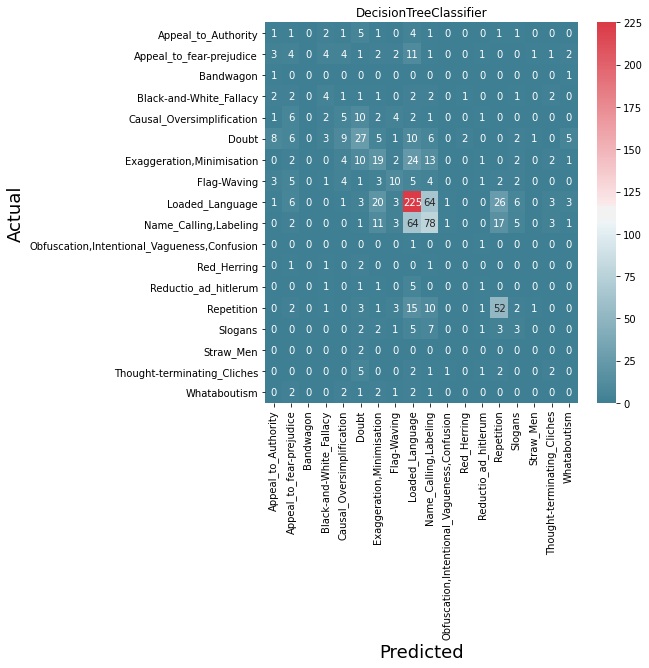

********************************************************************************************************
********************************************************************************************************
GradientBoostingClassifier
Accuracy:  0.5293542074363993
Confusion_matrix:
[[  2   1   0   0   1   9   0   0   1   1   1   0   1   0   0   1   0   0]
 [  1   7   0   1   1  12   3   1   9   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   7   0   1   1   0   3   0   5   0   0   0   1   0   0   0   0   1]
 [  0   2   0   1  14  11   0   0   4   0   0   0   1   0   0   0   0   1]
 [  3   1   0   3  11  47   5   0   8   2   0   1   2   0   0   0   0   2]
 [  0   2   0   0   1   6  23   1  31   7   0   0   1   2   2   1   3   0]
 [  0   2   0   2   1   9   2  11   8   4   0   0   0   0   2   0   0   0]
 [  0   4   0   0   3   4   6   1 289  37   1   2   3   9   1   0   1   1]
 [  3   0   0   0   0   0   6   1  67 10

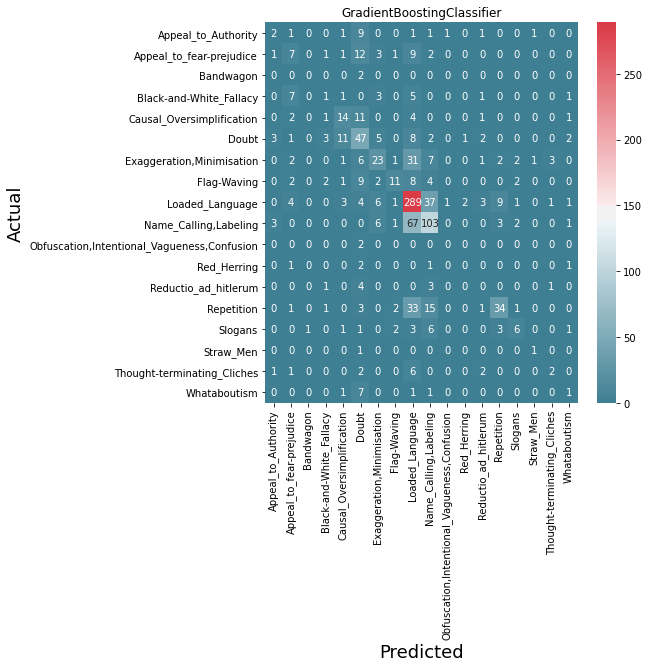

********************************************************************************************************
********************************************************************************************************
AdaBoostClassifier
Accuracy:  0.3943248532289628
Confusion_matrix:
[[  0   0   0   0   0  16   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  28   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  17   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0  31   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  73   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  25   2   0  53   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  19   0   0  19   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  30   2   0 323   6   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0  15   0   0 167   4   0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


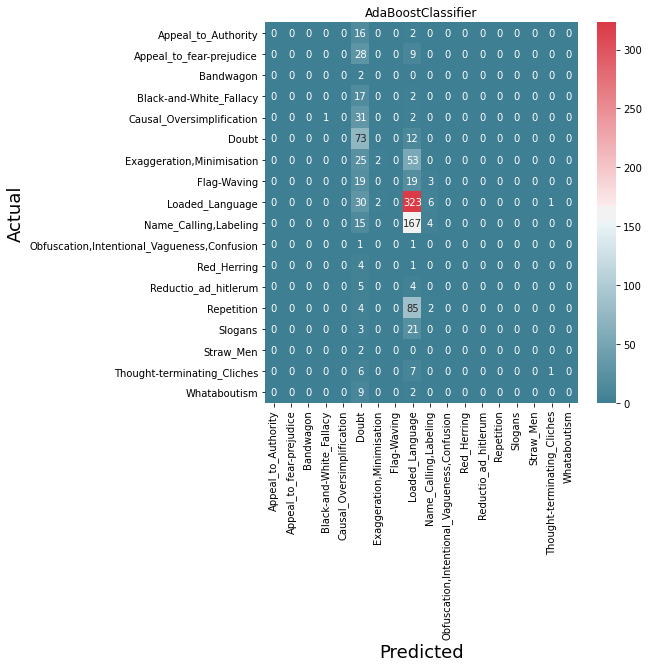

********************************************************************************************************
********************************************************************************************************
RandomForestClassifier
Accuracy:  0.5518590998043053
Confusion_matrix:
[[  0   1   0   0   0  14   0   0   2   1   0   0   0   0   0   0   0   0]
 [  1   3   0   1   0  19   1   0  11   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   1   1   9   1   0   5   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   3  25   0   0   5   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0  67   1   0  11   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8  17   1  39  12   0   0   0   2   0   0   1   0]
 [  0   2   0   0   1  10   1  11  12   3   0   0   0   1   0   0   0   0]
 [  0   1   0   0   0   6   3   0 305  40   0   0   0   6   0   0   1   0]
 [  0   0   0   0   0   1   4   0  74  98   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


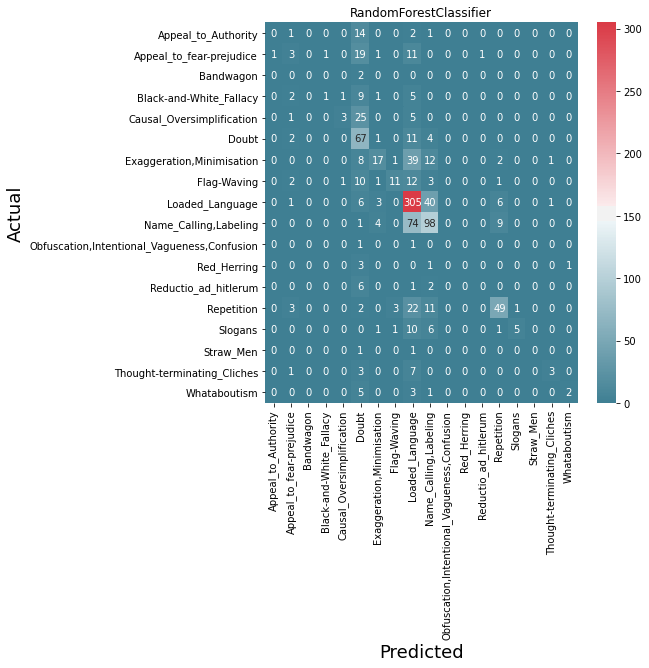

********************************************************************************************************


In [124]:
accuracies =[]
f1scores=[]

for clf in clfs:
    path = '/content/drive/My Drive/Colab Notebooks/TextAnalytics/multiClass results/',clf.__class__.__name__,'confusion_matrix'
    try:
      accuracy, f1score = computeScores(clf, x_train, y_train, x_test, y_test)
      accuracies.append(accuracy)
      f1scores.append(f1score)
    except AttributeError as e:
      print(e)

In [0]:
x_updated = x[[' negative_op_count', 'avg_word_sim', 'vad_neu', 'x_y', 'avg_sent_sim', 'SMOG', ' Happiness', 'y_2', 'x_2']]

In [0]:
clfs_name=[]
for clf in clfs:
  clfs_name.append(clf.__class__.__name__)

In [125]:
clfs_name

['XGBClassifier',
 'LGBMClassifier',
 'ExtraTreesClassifier',
 'ExtraTreeClassifier',
 'DecisionTreeClassifier',
 'GradientBoostingClassifier',
 'AdaBoostClassifier',
 'RandomForestClassifier']

In [126]:
accuracies

[0.5293542074363993,
 0.5440313111545988,
 0.538160469667319,
 0.41193737769080235,
 0.4217221135029354,
 0.5293542074363993,
 0.3943248532289628,
 0.5518590998043053]

In [0]:
result = {}
result['Accuracy'] = accuracies
result['Classifier'] = clfs_name

In [0]:
df_result = pd.DataFrame.from_dict(result)

In [136]:
df_result.head()

,Accuracy,Classifier
0,0.529354,XGBClassifier
1,0.544031,LGBMClassifier
2,0.538160,ExtraTreesClassifier
3,0.411937,ExtraTreeClassifier
4,0.421722,DecisionTreeClassifier


In [137]:
df_result.sort_values("Accuracy")

,Accuracy,Classifier
6,0.394325,AdaBoostClassifier
3,0.411937,ExtraTreeClassifier
4,0.421722,DecisionTreeClassifier
0,0.529354,XGBClassifier
5,0.529354,GradientBoostingClassifier
2,0.538160,ExtraTreesClassifier
1,0.544031,LGBMClassifier
7,0.551859,RandomForestClassifier


In [0]:
df_result.reset_index(drop=True, inplace=True)

In [141]:
df_result.head()

,Accuracy,Classifier
0,0.529354,XGBClassifier
1,0.544031,LGBMClassifier
2,0.538160,ExtraTreesClassifier
3,0.411937,ExtraTreeClassifier
4,0.421722,DecisionTreeClassifier


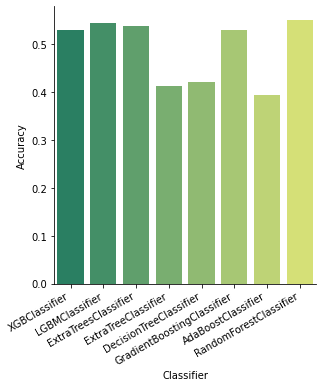

In [165]:
g = sns.catplot(x="Classifier", y="Accuracy",kind='bar', data=df_result, palette='summer')
g.fig.autofmt_xdate()

# g = sns.barplot(x="Classifier", y="Accuracy", data=df_result, palette='summer')
# g.fig.autofmt_xdate()

In [0]:
df_result.head()

,Classifier,Accuracy
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.529354
1,"LGBMClassifier(boosting_type='gbdt', class_wei...",0.544031
2,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",0.543053
3,"ExtraTreeClassifier(ccp_alpha=0.0, class_weigh...",0.409980
4,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.501957


In [0]:
x_updated.head()

,negative_op_count,avg_word_sim,vad_neu,x_y,avg_sent_sim,SMOG,FKE,Happiness,y_2,x_2
0,0.000000,0.065506,0.577,0.041495,0.5215,3.000000,18.4200,5.165000,0.330348,0.064896
1,0.071429,0.339890,0.588,0.215306,0.5215,8.477226,6.7271,5.694545,0.330348,1.676765
2,0.000000,1.712280,0.250,1.084657,0.5215,3.000000,8.7900,4.400000,0.330348,14.397043
3,0.076923,0.719379,0.699,0.455696,0.5215,3.000000,0.5000,5.105000,0.330348,0.000000
4,0.133333,0.910841,0.636,0.576979,0.5215,8.477226,8.5415,5.050000,0.330348,0.000000


In [0]:
x_train_updated, x_test_updated, y_train_updated, y_test_updated = model_selection.train_test_split(x_updated, y, test_size=0.2,random_state = 42, stratify = y)

In [0]:
accuraciesU =[]
f1scoresU=[]
for clf in clfs:
    path = '/content/drive/My Drive/Colab Notebooks/TextAnalytics/multiClass results/',clf.__class__.__name__,'confusion_matrix'
    try:
      accuracy, f1score = computeScores(clf, x_train_updated, y_train_updated, x_test_updated, y_test_updated, path)
      accuraciesU.append(accuracy)
      f1scoresU.append(f1score)
    except AttributeError as e:
      print(e)

In [0]:
print("Classifier                       Accuracy              AccuracyUpdated")
for i in range(len(clfs)): 
  print(clfs[i].__class__.__name__, "       ",accuracies[i],"       ",accuraciesU[i] )


Classifier                       Accuracy              AccuracyUpdated
XGBClassifier         0.5293542074363993         0.42367906066536204
LGBMClassifier         0.5440313111545988         0.4227005870841487
ExtraTreesClassifier         0.5430528375733855         0.4295499021526419
ExtraTreeClassifier         0.40998043052837574         0.3356164383561644
BaggingClassifier         0.5019569471624267         0.40117416829745595
DecisionTreeClassifier         0.4227005870841487         0.34442270058708413
GradientBoostingClassifier         0.5283757338551859         0.4158512720156556
LogisticRegression         0.3933463796477495         0.3522504892367906
AdaBoostClassifier         0.3953033268101761         0.2945205479452055
RandomForestClassifier         0.5518590998043053         0.4315068493150685


BaggingClassifier does not have feature_importances_ attribute
LogisticRegression does not have feature_importances_ attribute


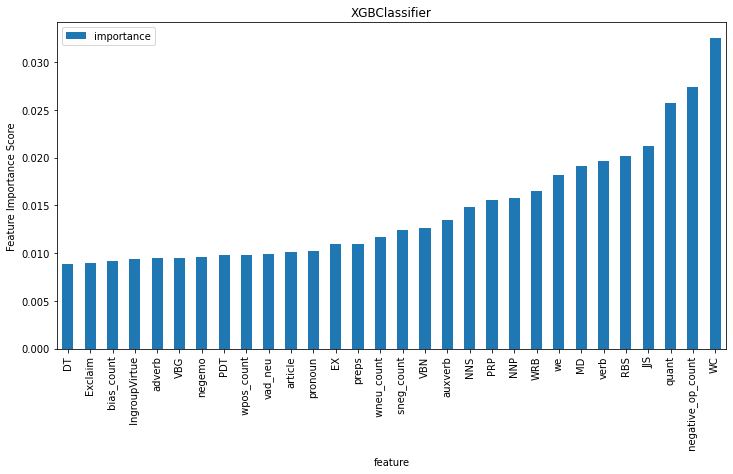

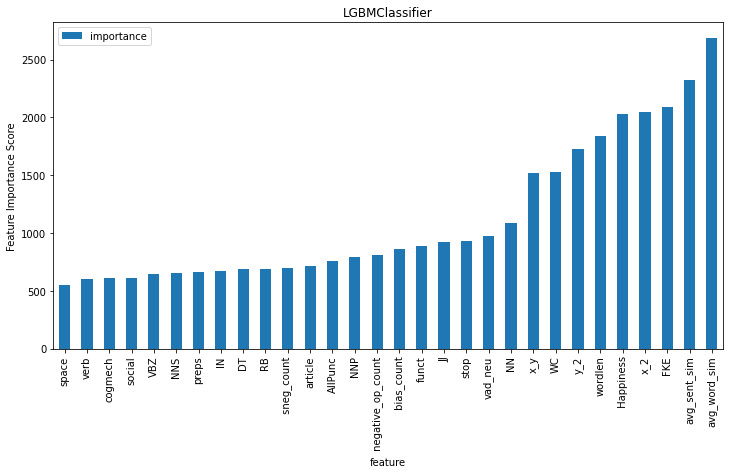

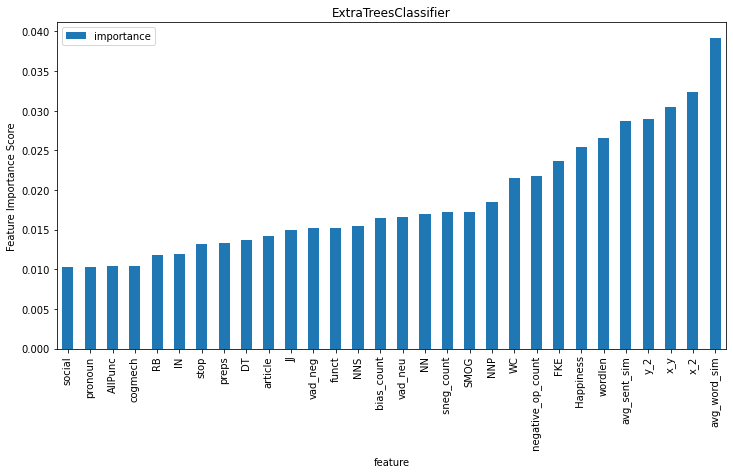

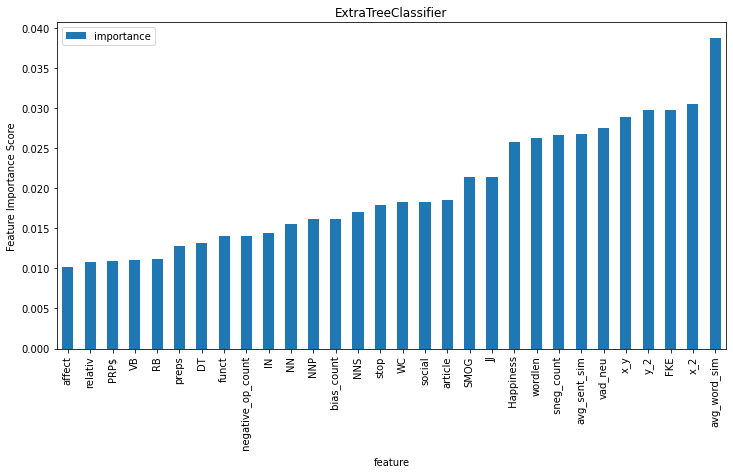

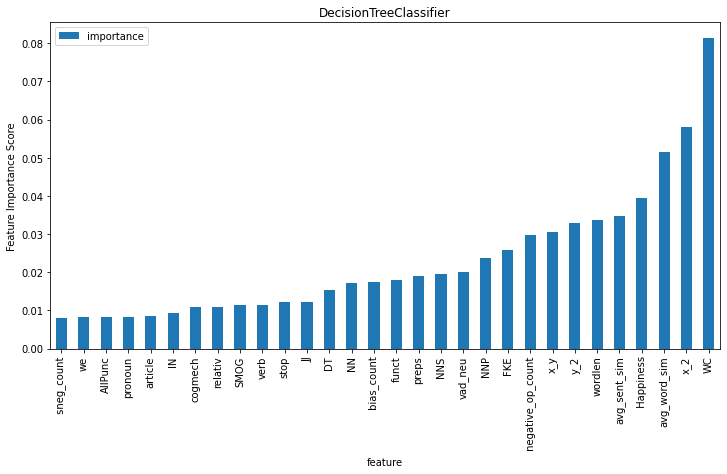

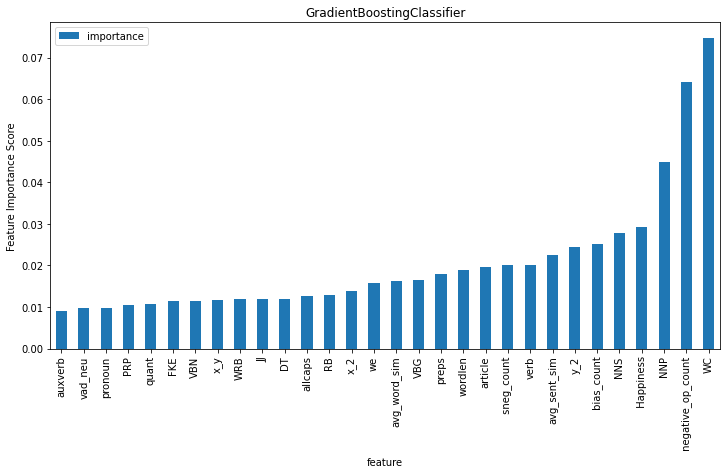

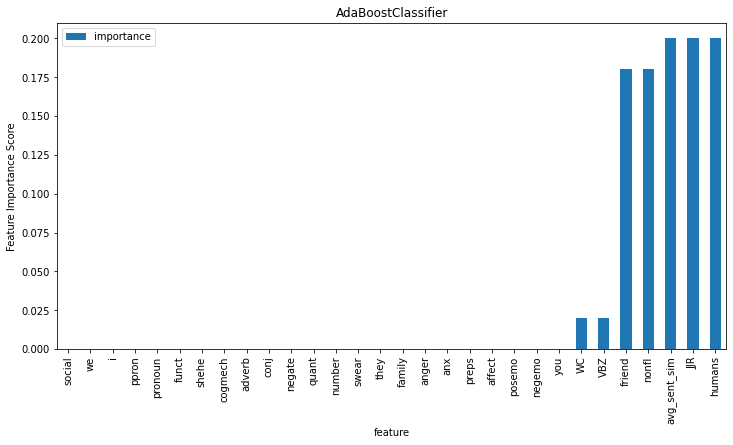

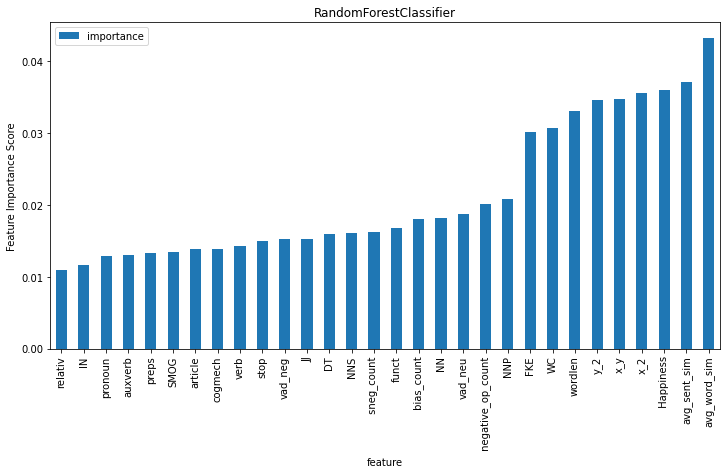

In [0]:
for clf in clfs:
    try:
      _ = plot_feature_importances(clf, x_train, y_train, top_n= 30, title=clf.__class__.__name__)
      accuracies.append(accuracy)
      f1scores.append(f1score)
    except AttributeError as e:
      print(e)

In [0]:
x_updated = x[['FKE', ' Happiness',' negative_op_count', 'vad_neu', 'wordlen', 'vad_neg', ' sneg_count', 'funct', 'AllPunc', 'WC', 'stop', 'SMOG', 'NN','JJ','NNP','cogmech', 'DT', 'article', 'relativ','preps']]

In [0]:
x_updated.head()

,FKE,Happiness,negative_op_count,vad_neu,wordlen,vad_neg,sneg_count,funct,AllPunc,WC,stop,SMOG,NN,JJ,NNP,cogmech,DT,article,relativ,preps
0,17.6067,5.258182,0.000000,0.833,6.818182,0.167,0.000000,15.384615,7.692308,13,0.153846,12.486833,0.083333,0.166667,0.583333,15.384615,0.000000,0.000000,7.692308,7.692308
1,10.4346,5.489474,0.068966,0.741,4.500000,0.088,0.034483,41.379310,6.896552,29,0.310345,10.745967,0.120000,0.040000,0.000000,13.793103,0.080000,0.000000,10.344828,10.344828
2,16.6995,5.416875,0.000000,0.713,4.750000,0.067,0.000000,29.545455,13.636364,44,0.272727,10.745967,0.138889,0.055556,0.388889,6.818182,0.111111,9.090909,4.545455,11.363636
3,10.1971,5.277273,0.052632,0.785,4.304348,0.109,0.000000,42.105263,2.631579,38,0.394737,8.477226,0.151515,0.060606,0.121212,7.894737,0.181818,18.421053,10.526316,7.894737
4,8.5415,5.050000,0.133333,0.636,5.000000,0.214,0.133333,40.000000,6.666667,15,0.266667,8.477226,0.153846,0.076923,0.076923,13.333333,0.153846,13.333333,13.333333,6.666667


In [0]:
x_train_updated, x_test_updated, y_train_updated, y_test_updated = model_selection.train_test_split(x_updated, y, test_size=0.2,random_state = 42, stratify = y)